Missing Data:
SK_ID_CURR                       0
TARGET                           0
NAME_CONTRACT_TYPE               0
CODE_GENDER                      0
FLAG_OWN_CAR                     0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     3634
AMT_REQ_CREDIT_BUREAU_WEEK    3634
AMT_REQ_CREDIT_BUREAU_MON     3634
AMT_REQ_CREDIT_BUREAU_QRT     3635
AMT_REQ_CREDIT_BUREAU_YEAR    3635
Length: 122, dtype: int64

Cleaned Application Data:
   SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    40

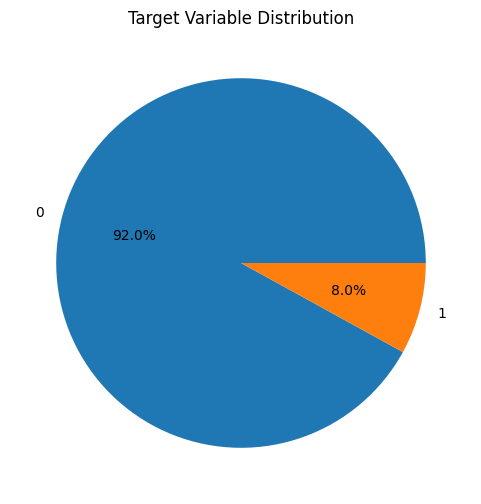

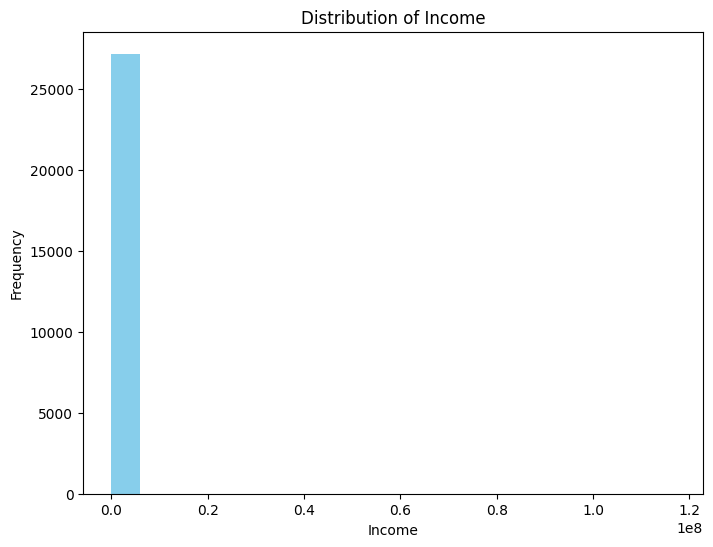

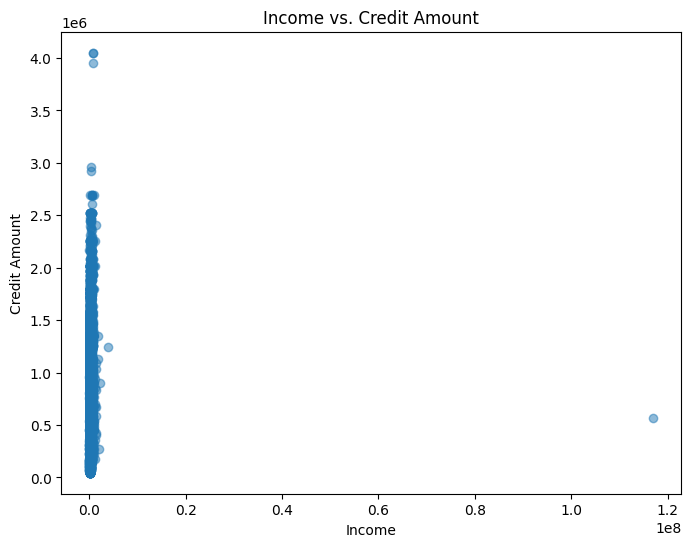


Top Correlations:
EXT_SOURCE_3                   0.189575
EXT_SOURCE_2                   0.152612
DAYS_BIRTH                     0.083791
REGION_RATING_CLIENT_W_CITY    0.067030
REGION_RATING_CLIENT           0.066832
DAYS_LAST_PHONE_CHANGE         0.055131
FLAG_DOCUMENT_3                0.047539
DEF_60_CNT_SOCIAL_CIRCLE       0.047519
REG_CITY_NOT_WORK_CITY         0.046455
DEF_30_CNT_SOCIAL_CIRCLE       0.046217
Name: TARGET, dtype: float64


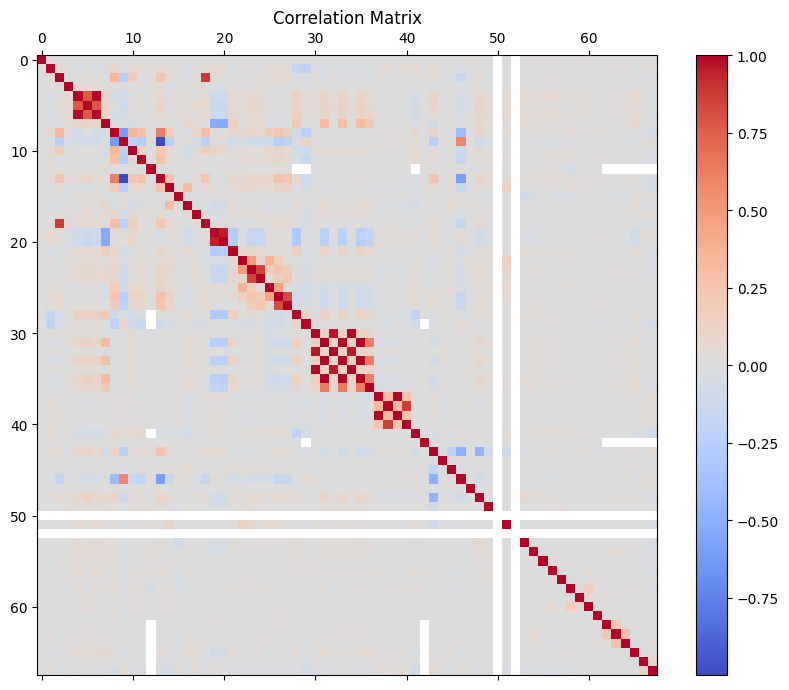

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import chardet

# Load dataset files
application_data = pd.read_csv('/content/application_data.csv')
previous_application = pd.read_csv('/content/previous_application.csv')

# Detect encoding for 'columns_description.csv'
with open("/content/columns_description.csv", "rb") as f:
    encoding = chardet.detect(f.read())["encoding"]

columns_description = pd.read_csv("/content/columns_description.csv", encoding=encoding)

# Data Cleaning and Preprocessing
# Identify missing data
missing_data = application_data.isnull().sum()
print("Missing Data:")
print(missing_data)

# Drop columns with more than 50% missing values
threshold = len(application_data) * 0.5
application_data_cleaned = application_data.dropna(thresh=threshold, axis=1)
print("\nCleaned Application Data:")
print(application_data_cleaned.head())

# Detect outliers (using z-score) for numeric columns only
numeric_columns = application_data_cleaned.select_dtypes(include=['number']).columns
outliers = application_data_cleaned[numeric_columns][(application_data_cleaned[numeric_columns].apply(lambda x: abs(x - x.mean()) / x.std() > 3)).any(axis=1)]
print("\nOutliers:")
print(outliers)

# Data Imbalance Analysis
target_counts = application_data['TARGET'].value_counts()
imbalance_ratio = target_counts[1] / target_counts[0]
print("\nImbalance Ratio:")
print(imbalance_ratio)

# Visualize data imbalance
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=target_counts.index, autopct='%1.1f%%')
plt.title('Target Variable Distribution')
plt.show()

# Univariate Analysis
plt.figure(figsize=(8, 6))
plt.hist(application_data['AMT_INCOME_TOTAL'], bins=20, color='skyblue')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Bivariate Analysis
plt.figure(figsize=(8, 6))
plt.scatter(application_data['AMT_INCOME_TOTAL'], application_data['AMT_CREDIT'], alpha=0.5)
plt.title('Income vs. Credit Amount')
plt.xlabel('Income')
plt.ylabel('Credit Amount')
plt.show()

# Top Correlation Analysis
correlation_matrix = application_data_cleaned.select_dtypes(include=['number']).corr()
target_correlations = correlation_matrix['TARGET'].dropna().abs()
top_correlations = target_correlations.nlargest(11)[1:]  # Exclude target variable
print("\nTop Correlations:")
print(top_correlations)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
plt.matshow(correlation_matrix, cmap='coolwarm', fignum=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()


In [26]:
# Find the most correlated variables
most_correlated_variables = correlation_matrix.unstack().sort_values(ascending=False)

# Remove correlations of variables with themselves
most_correlated_variables = most_correlated_variables[most_correlated_variables != 1.0]

# Display the top correlated variables
print(most_correlated_variables.head())

OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE        0.998386
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE        0.998386
FLOORSMAX_AVG                FLOORSMAX_MEDI                  0.997388
FLOORSMAX_MEDI               FLOORSMAX_AVG                   0.997388
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MEDI    0.991384
dtype: float64


In [32]:
most_correlated_variables[~most_correlated_variables.isna()].tail(20)

REGION_RATING_CLIENT_W_CITY  EXT_SOURCE_2                  -0.287663
EXT_SOURCE_2                 REGION_RATING_CLIENT_W_CITY   -0.287663
REGION_RATING_CLIENT         EXT_SOURCE_2                  -0.291613
EXT_SOURCE_2                 REGION_RATING_CLIENT          -0.291613
FLAG_DOCUMENT_6              DAYS_BIRTH                    -0.401374
DAYS_BIRTH                   FLAG_DOCUMENT_6               -0.401374
FLAG_DOCUMENT_8              FLAG_DOCUMENT_3               -0.466572
FLAG_DOCUMENT_3              FLAG_DOCUMENT_8               -0.466572
                             FLAG_DOCUMENT_6               -0.483844
FLAG_DOCUMENT_6              FLAG_DOCUMENT_3               -0.483844
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT_W_CITY   -0.532920
REGION_RATING_CLIENT_W_CITY  REGION_POPULATION_RELATIVE    -0.532920
REGION_POPULATION_RELATIVE   REGION_RATING_CLIENT          -0.534327
REGION_RATING_CLIENT         REGION_POPULATION_RELATIVE    -0.534327
FLAG_EMP_PHONE               FLAG_

In [33]:
most_correlated_variables[~most_correlated_variables.isna()].head(30)

OBS_60_CNT_SOCIAL_CIRCLE      OBS_30_CNT_SOCIAL_CIRCLE        0.998386
OBS_30_CNT_SOCIAL_CIRCLE      OBS_60_CNT_SOCIAL_CIRCLE        0.998386
FLOORSMAX_AVG                 FLOORSMAX_MEDI                  0.997388
FLOORSMAX_MEDI                FLOORSMAX_AVG                   0.997388
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MEDI    0.991384
YEARS_BEGINEXPLUATATION_MEDI  YEARS_BEGINEXPLUATATION_AVG     0.991384
FLOORSMAX_MEDI                FLOORSMAX_MODE                  0.989243
FLOORSMAX_MODE                FLOORSMAX_MEDI                  0.989243
AMT_GOODS_PRICE               AMT_CREDIT                      0.986830
AMT_CREDIT                    AMT_GOODS_PRICE                 0.986830
FLOORSMAX_MODE                FLOORSMAX_AVG                   0.986757
FLOORSMAX_AVG                 FLOORSMAX_MODE                  0.986757
YEARS_BEGINEXPLUATATION_AVG   YEARS_BEGINEXPLUATATION_MODE    0.968161
YEARS_BEGINEXPLUATATION_MODE  YEARS_BEGINEXPLUATATION_AVG     0.968161
      

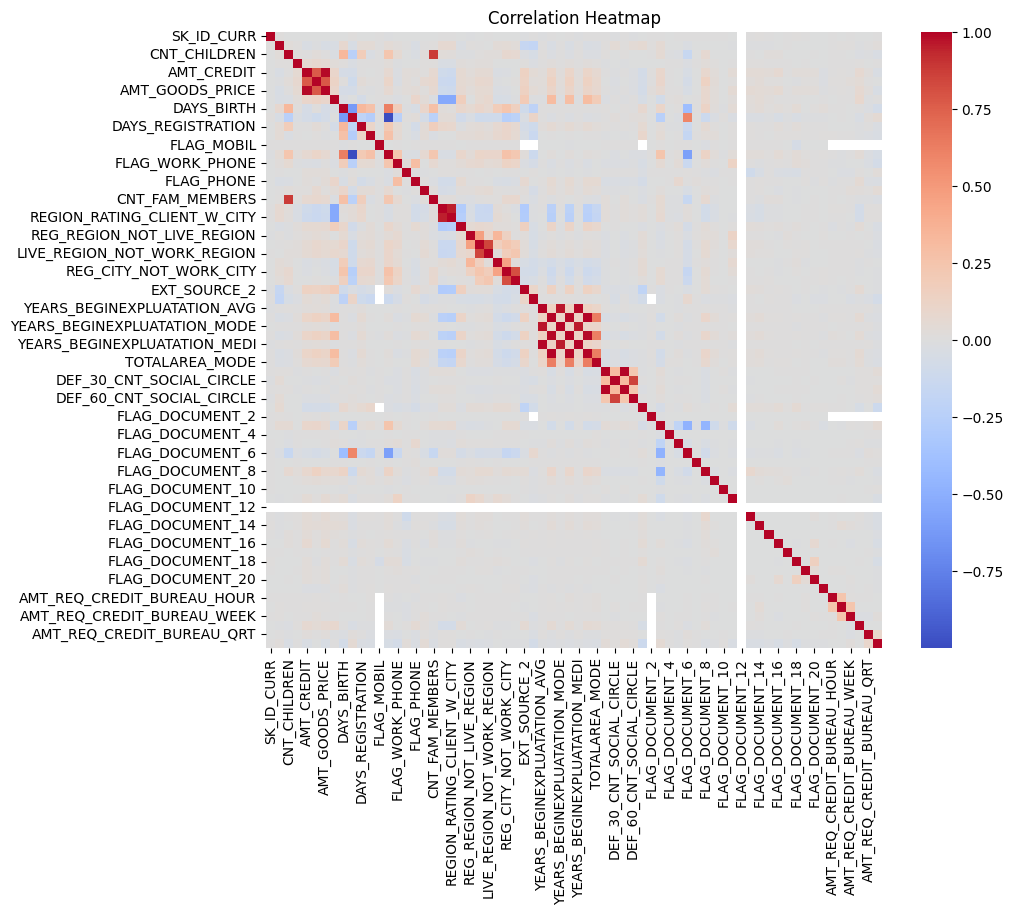

In [35]:
# Create a heatmap

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()